In [1]:
data(iris)

# subset of iris data frame - extract only species versicolor and setosa
# we will only focus on the sepal and petal lengths of the dataset
irissubdf <- iris[1:100, c(1, 3, 5)]
names(irissubdf) <- c("sepal", "petal", "species")
head(irissubdf)

sepal,petal,species
5.1,1.4,setosa
4.9,1.4,setosa
4.7,1.3,setosa
4.6,1.5,setosa
5.0,1.4,setosa
5.4,1.7,setosa


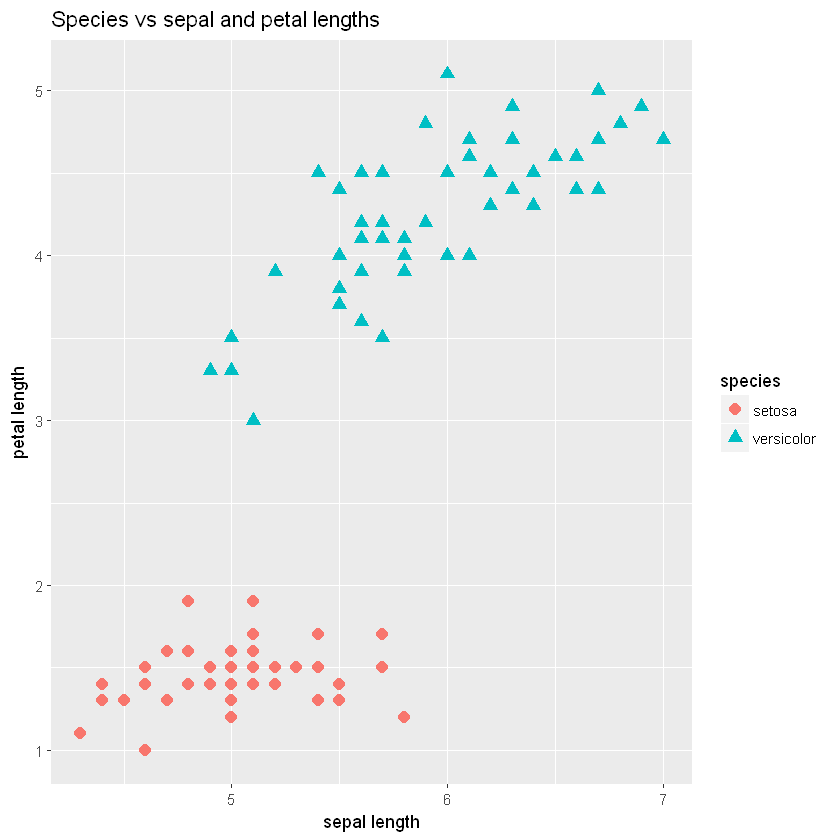

In [2]:
library(ggplot2)
ggplot(irissubdf, aes(x = sepal, y = petal)) + 
        geom_point(aes(colour=species, shape=species), size = 3) +
        xlab("sepal length") + 
        ylab("petal length") + 
        ggtitle("Species vs sepal and petal lengths")

In [3]:
# add binary labels corresponding to species - Initialize all values to 1
# add setosa label of -1. The binary +1, -1 labels are in the fourth  
# column. It is better to create two separate data frames: one containing
# the attributes while the other contains the class values.
irissubdf[, 4] <- 1
irissubdf[irissubdf[, 3] == "setosa", 4] <- -1

x <- irissubdf[, c(1, 2)]
y <- irissubdf[, 4]

# head and tail of data 
head(x)

sepal,petal
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7


In [4]:
head(y)

[1] -1 -1 -1 -1 -1 -1

In [5]:
# write function that takes in the data frame, learning rate - eta, and number of epochs - n.iter and updates the weight factor. At this stage, I am only conserned with the final weight and the number of epochs required for the weight to converge

perceptron <- function(x, y, eta, niter) {
        
        # initialize weight vector
        weight <- rep(0, dim(x)[2] + 1)
        errors <- rep(0, niter)
        
        
        # loop over number of epochs niter
        for (jj in 1:niter) {
                
                # loop through training data set
                for (ii in 1:length(y)) {
                        
                        # Predict binary label using Heaviside activation 
                        # function
                        z <- sum(weight[2:length(weight)] * 
                                         as.numeric(x[ii, ])) + weight[1]
                        if(z < 0) {
                                ypred <- -1
                        } else {
                                ypred <- 1
                        }
                        
                        # Change weight - the formula doesn't do anything 
                        # if the predicted value is correct
                        weightdiff <- eta * (y[ii] - ypred) * 
                                c(1, as.numeric(x[ii, ]))
                        weight <- weight + weightdiff
                        
                        # Update error function
                        if ((y[ii] - ypred) != 0.0) {
                                errors[jj] <- errors[jj] + 1
                        }
                        
                }
        }
        
        # weight to decide between the two species 
        print(weight)
        return(errors)
}

err <- perceptron(x, y, 1, 10)

[1] -4.0 -6.8 18.2


In [8]:

err

sepal,petal
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7
4.6,1.4
5.0,1.5
4.4,1.4
4.9,1.5


[1] 2 2 3 2 1 0 0 0 0 0

In [6]:
weight <- rep(0, dim(x)[2] + 1)
weight
dim(x)
dim(x)[2]
for (ii in 1:length(y)) {
z <- sum(weight[2:length(weight)] * as.numeric(x[ii, ])) + weight[1]
cat((z))}
z
                       # if(z < 0) {ypred <- -1} else {ypred <- 1}
                        
                        # Change weight - the formula doesn't do anything 
                        # if the predicted value is correct
                       # weightdiff <- eta * (y[ii] - ypred) * c(1, as.numeric(x[ii, ]))
                        #weight <- weight + weightdiff
                        
                        # Update error function
                        #if ((y[ii] - ypred) != 0.0) {
                         #       errors[jj] <- errors[jj] + 1

[1] 0 0 0

[1] 100   2

[1] 2

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

[1] 0

In [2]:
 euclidean.norm = function(x) {(sum(x * x))}
perceptron = function(x, y, learning.rate=1) {
 w = vector(length = ncol(x)) # initialize w
 b = 0 # Initialize b
 k = 0 # count updates
 R = max(apply(x, 1, euclidean.norm))
 made.mistake = TRUE # to enter the while loop
 while (made.mistake) {
 made.mistake=FALSE # hopefully
 yc <- classify.linear(x,w,b)
 for (i in 1:nrow(x)) {
 if (y[i] != yc[i]) {
 w <- w + learning.rate * y[i]*x[i,]
 b <- b + learning.rate * y[i]*R^2
 k <- k+1
 made.mistake=TRUE
 }
 } }
 s = euclidean.norm(w)
 return(list(w=w/s,b=b/s,updates=k))
 }

In [ ]:
y = data[,ncol(data)]
x = data[,-ncol(data)]

In [ ]:
#library(rgl)
# Random.Unit returns n dim-dimensional points in the unit interval labeled
# -1 or 1. The label depends on whether or not the sum of the vector's 
# components exceeds the given threshold. That is, -1 if sum(vector) < threshold
# and 1 otherwise.
Random.Unit <-function(n, dim, threshold) {
  points <- runif(n * dim)
  points <- matrix(points, ncol = dim)
  label <- ifelse(apply(points, 1, sum) < threshold, -1, 1)
  return(cbind(label, x0 = rep(1, n), points))
}

# Classify is our simple classification rule for the perceptron.We simply 
# return the sign of the dot-product of our observations and weights
Classify <- function(x, weights) {
  return(sign(x %*% weights))
}

# Perceptron is a simple implementation of the perceptron learning algorithm.
# It accepts data of the form data[1] = label, data[2] = x_0 = 1, data[3] = x_1,
# etc. w0 is initilized to -threshold and the weights returned are such that
# sign(w_0 * x_0 + w_1 * x_1 + ... + w_n * x_n) == label
Perceptron <- function(data, threshold) {
  w <- c(-threshold, runif(ncol(data) - 2))
  n <- nrow(data)
  label <- data[ , 1]
  obs <- data[ , 2:ncol(data)]
  misclassfied <- TRUE
  while (misclassfied) {
    misclassfied <- FALSE
    for (i in 1:n) {
      if (label[i] * Classify(obs[i , ], w) <= 0) {
        w <- w + label[i] * obs[i , ]
        misclassfied <- TRUE
      }
    }
  }
  return(w)
}

# Plot3D is essentially a wrapper for the rgl package's plot3d function.
# It plots the result of a call to Random.Unit with dim = 3
# as well as the plane parameterized by ax + by + cz + d = 0
Plot3D <- function(points, a, b, c, d) {
  plot3d(points[, 3:5], xlab = "X", ylab = "Y", zlab = "Z",
         pch = ifelse(points[, 1] == 1, 2, 8),
         col = ifelse(points[, 1] == 1, "blue", "red"))
  planes3d(a, b, c, d)
}

# Plot2D plots the result of a call to Random.Unit with dim = 2 as well
# as the line parameterized by y = bx + a, as in the call to abline.
Plot2D <- function(points, a, b) {
  plot(points[, 3:4], xlab = "X", ylab = "Y",
       pch = ifelse(points[, 1] == 1, 2, 8),
       col = ifelse(points[, 1] == 1, "blue", "red"))
  abline(a, b)
}

THRESHOLD <- 1.5
pts <- Random.Unit(1000, 3, THRESHOLD)
Plot3D(pts, 1, 1, 1, -THRESHOLD)
w <- Perceptron(pts, THRESHOLD)
Plot3D(pts, w[4], w[3], w[2], w[1])

THRESHOLD <- 0.75
pts <- Random.Unit(1000, 2, THRESHOLD)
Plot2D(pts, THRESHOLD, -1)
w <- Perceptron(pts, THRESHOLD)
Plot2D(pts, -w[1]/w[3], -w[2]/ w[3])